In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor







In [12]:
boston=load_boston()
X=pd.DataFrame(boston.data,columns=boston.feature_names)
y=pd.Series(boston.target)

In [14]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.23,random_state=0)


In [28]:
gradientregressor=GradientBoostingRegressor(max_depth=2,n_estimators=4,learning_rate=1.0)

In [29]:
model=gradientregressor.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([25.44804558, 21.28922494, 21.28922494,  8.41992378, 21.28922494,
       21.28922494, 21.28922494, 21.28922494, 21.28922494, 21.28922494,
        8.41992378, 15.24536225, 14.14852771,  8.41992378, 47.95244897,
       31.4618788 , 21.28922494, 31.4618788 , 27.13371111, 21.28922494,
       25.44804558, 21.28922494, 21.28922494, 25.44804558, 21.28922494,
       20.70039395, 21.28922494, 14.14852771, 47.95244897, 14.14852771,
       13.55969672, 21.28922494, 21.28922494, 21.28922494, 21.28922494,
       21.28922494,  8.41992378, 21.28922494, 14.14852771, 14.14852771,
       21.28922494, 21.28922494, 21.28922494, 14.14852771, 21.28922494,
       21.28922494, 14.14852771, 14.14852771, 14.14852771, 22.97489047,
       14.14852771, 14.14852771, 21.28922494, 47.95244897, 14.14852771,
       14.14852771, 21.28922494, 21.28922494, 20.70039395, 14.14852771,
       25.44804558, 21.28922494, 31.4618788 , 38.91617024, 20.70039395,
       27.13371111, 15.83419323, 14.14852771, 19.57352994, 21.28

In [31]:
r2_score(y_pred,y_test)

0.5748035581337423

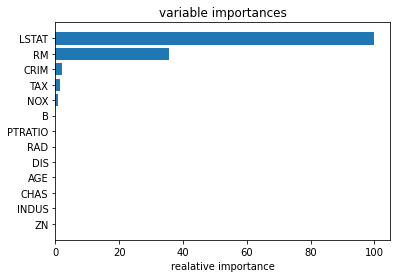

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
feature_importance=model.feature_importances_
feature_importance=100.0* (feature_importance/ feature_importance.max())
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+.5
plt.barh(pos,feature_importance[sorted_idx],align="center")
plt.yticks(pos,boston.feature_names[sorted_idx])
plt.xlabel("realative importance")
plt.title( "variable importances")
plt.show()


[0.01504843 0.         0.         0.         0.00642123 0.25451045
 0.         0.         0.         0.01111087 0.         0.
 0.71290903]


# TUNING THE HYPERPARAMETERS

In [53]:
from sklearn.model_selection import GridSearchCV
lr={"learning_rate":[0.12,0.15,0.05,0.7],'n_estimators':[100,200,120,150,250]}
tuning=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=lr,scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_,tuning.best_score_

({'learning_rate': 0.12, 'n_estimators': 250}, 0.8882503059933233)